In [29]:
%matplotlib inline

import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys
sys.version

'3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]'

In [10]:
chunksize = 50000

tp = pd.read_csv(
    '..\\pisa2012.csv',
    encoding='latin1',
    index_col=0,
    dtype={15: str, 16: str, 17: str, 21: str, 22: str, 23: str, 24: str, 25: str, 26: str, 37: str,
           45: str, 65: str, 123: str, 156: str, 157: str, 158: str, 159: str, 160: str, 161: str,
           162: str, 163: str, 164: str, 165: str, 166: str, 167: str, 168: str, 169: str, 170: str,
           171: str, 284: str, 285: str, 286: str, 287: str, 288: str, 289: str, 290: str, 291: str,
           292: str, 293: str, 294: str, 295: str, 296: str, 297: str, 298: str, 299: str, 300: str,
           301: str, 302: str, 303: str, 307: str, 308: str, 309: str, 310: str, 311: str, 312: str,
           313: str, 314: str, 315: str, 316: str, 317: str, 318: str, 319: str, 320: str, 321: str,
           322: str, 323: str, 324: str, 325: str, 326: str, 327: str, 328: str, 329: str, 330: str,
           331: str, 332: str, 333: str, 334: str, 335: str, 336: str, 337: str, 338: str, 339: str,
           340: str, 341: str, 342: str, 343: str, 344: str, 345: str, 346: str, 347: str, 348: str,
           349: str, 350: str, 351: str, 352: str, 353: str, 354: str, 355: str, 356: str, 357: str,
           376: str, 377: str, 378: str, 379: str, 380: str, 381: str, 382: str, 383: str, 384: str,
           385: str, 386: str, 387: str, 388: str, 389: str, 390: str, 391: str, 392: str, 393: str,
           394: str, 395: str, 396: str, 397: str, 398: str, 399: str, 400: str, 401: str, 402: str,
           403: str, 475: str, 30: str, 31: str, 36: str, 155: str},
    iterator=True,
    chunksize=chunksize
)

df_list = []

for df in tp:
    df = df.rename(columns={
                'CNT': 'country',
                'STIDSTD': 'studentId',
                'ST01Q01':  'internationalGrade',
                'ST03Q01':  'birthMonth',
                'ST03Q02':  'birthYear',
                'ST04Q01':  'gender',
                'ST08Q01':  'truancyLateForSchool',
                'ST09Q01':  'truancySkipSchoolDay',
                'ST115Q01':  'truancySkipClasses',
                'ST42Q02':  'notGoodMaths',
                'ST46Q06':  'payAttentionInClassesMath',
                'ST49Q01':  'talkAboutMaths',
                'ST49Q02':  'helpFriendsMaths',
                'ST49Q04':  'participateInCompetitions',
                'ST49Q05':  'studyMoreThan2ExtraHoursADay'
              })
    
    df_student_behavior = df[['country', 'studentId', 'internationalGrade', 'birthMonth', 'birthYear',
        'gender','truancyLateForSchool', 'truancySkipSchoolDay', 'truancySkipClasses', 'notGoodMaths',
        'payAttentionInClassesMath', 'talkAboutMaths', 'helpFriendsMaths', 'participateInCompetitions',
        'studyMoreThan2ExtraHoursADay']]
    
    df_list.append(df_student_behavior)
    
df_student_behavior = pd.concat(df_list)

In [52]:
df_student_behavior.info()
df_student_behavior.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 15 columns):
country                         485490 non-null object
studentId                       485490 non-null int64
internationalGrade              485490 non-null int64
birthMonth                      485490 non-null int64
birthYear                       485490 non-null int64
gender                          485490 non-null object
truancyLateForSchool            479143 non-null object
truancySkipSchoolDay            479131 non-null object
truancySkipClasses              479269 non-null float64
notGoodMaths                    313502 non-null object
payAttentionInClassesMath       312900 non-null object
talkAboutMaths                  313495 non-null object
helpFriendsMaths                313025 non-null object
participateInCompetitions       312378 non-null object
studyMoreThan2ExtraHoursADay    312582 non-null object
dtypes: float64(1), int64(4), object(10)
memory usage: 59.3+ MB


,country,studentId,internationalGrade,birthMonth,birthYear,gender,truancyLateForSchool,truancySkipSchoolDay,truancySkipClasses,notGoodMaths,payAttentionInClassesMath,talkAboutMaths,helpFriendsMaths,participateInCompetitions,studyMoreThan2ExtraHoursADay
1,Albania,1,10,2,1996,Female,None,None,1.0,Disagree,Agree,Often,Sometimes,Sometimes,Sometimes
2,Albania,2,10,2,1996,Female,One or two times,None,1.0,NaN,Agree,Sometimes,Often,Sometimes,Always or almost always
3,Albania,3,9,9,1996,Female,None,None,1.0,NaN,Agree,Sometimes,Always or almost always,Never or rarely,Always or almost always


In [77]:
print(df_student_behavior['truancyLateForSchool'].unique())
print(df_student_behavior['truancySkipSchoolDay'].unique())
print(df_student_behavior['notGoodMaths'].unique())
print(df_student_behavior['payAttentionInClassesMath'].unique())
print(df_student_behavior['talkAboutMaths'].unique())
print(df_student_behavior['helpFriendsMaths'].unique())
print(df_student_behavior['participateInCompetitions'].unique())
print(df_student_behavior['studyMoreThan2ExtraHoursADay'].unique())

['None  ' 'One or two times  ' 'Three or four times  ' nan
 'Five or more times  ']
['None  ' nan 'One or two times  ' 'Three or four times  '
 'Five or more times  ']
['Disagree' nan 'Strongly agree' 'Agree' 'Strongly disagree']
['Agree' nan 'Strongly agree' 'Disagree' 'Strongly disagree']
['Often' 'Sometimes' nan 'Always or almost always' 'Never or rarely']
['Sometimes' 'Often' 'Always or almost always' nan 'Never or rarely']
['Sometimes' 'Never or rarely' nan 'Often' 'Always or almost always']
['Sometimes' 'Always or almost always' nan 'Never or rarely' 'Often']


In [152]:
def get_variable_frequency(df, var):
    return df.groupby(['country', var]).mean()['internationalGrade'].reset_index()\
                .rename(columns={
                    var: 'frequency',
                    'internationalGrade': var
                })

In [162]:
get_variable_frequency(df_student_behavior, 'helpFriendsMaths').head()

,country,frequency,helpFriendsMaths
0,Albania,Always or almost always,9.559420
1,Albania,Never or rarely,9.657439
2,Albania,Often,9.578894
3,Albania,Sometimes,9.631038
4,Argentina,Always or almost always,9.431746


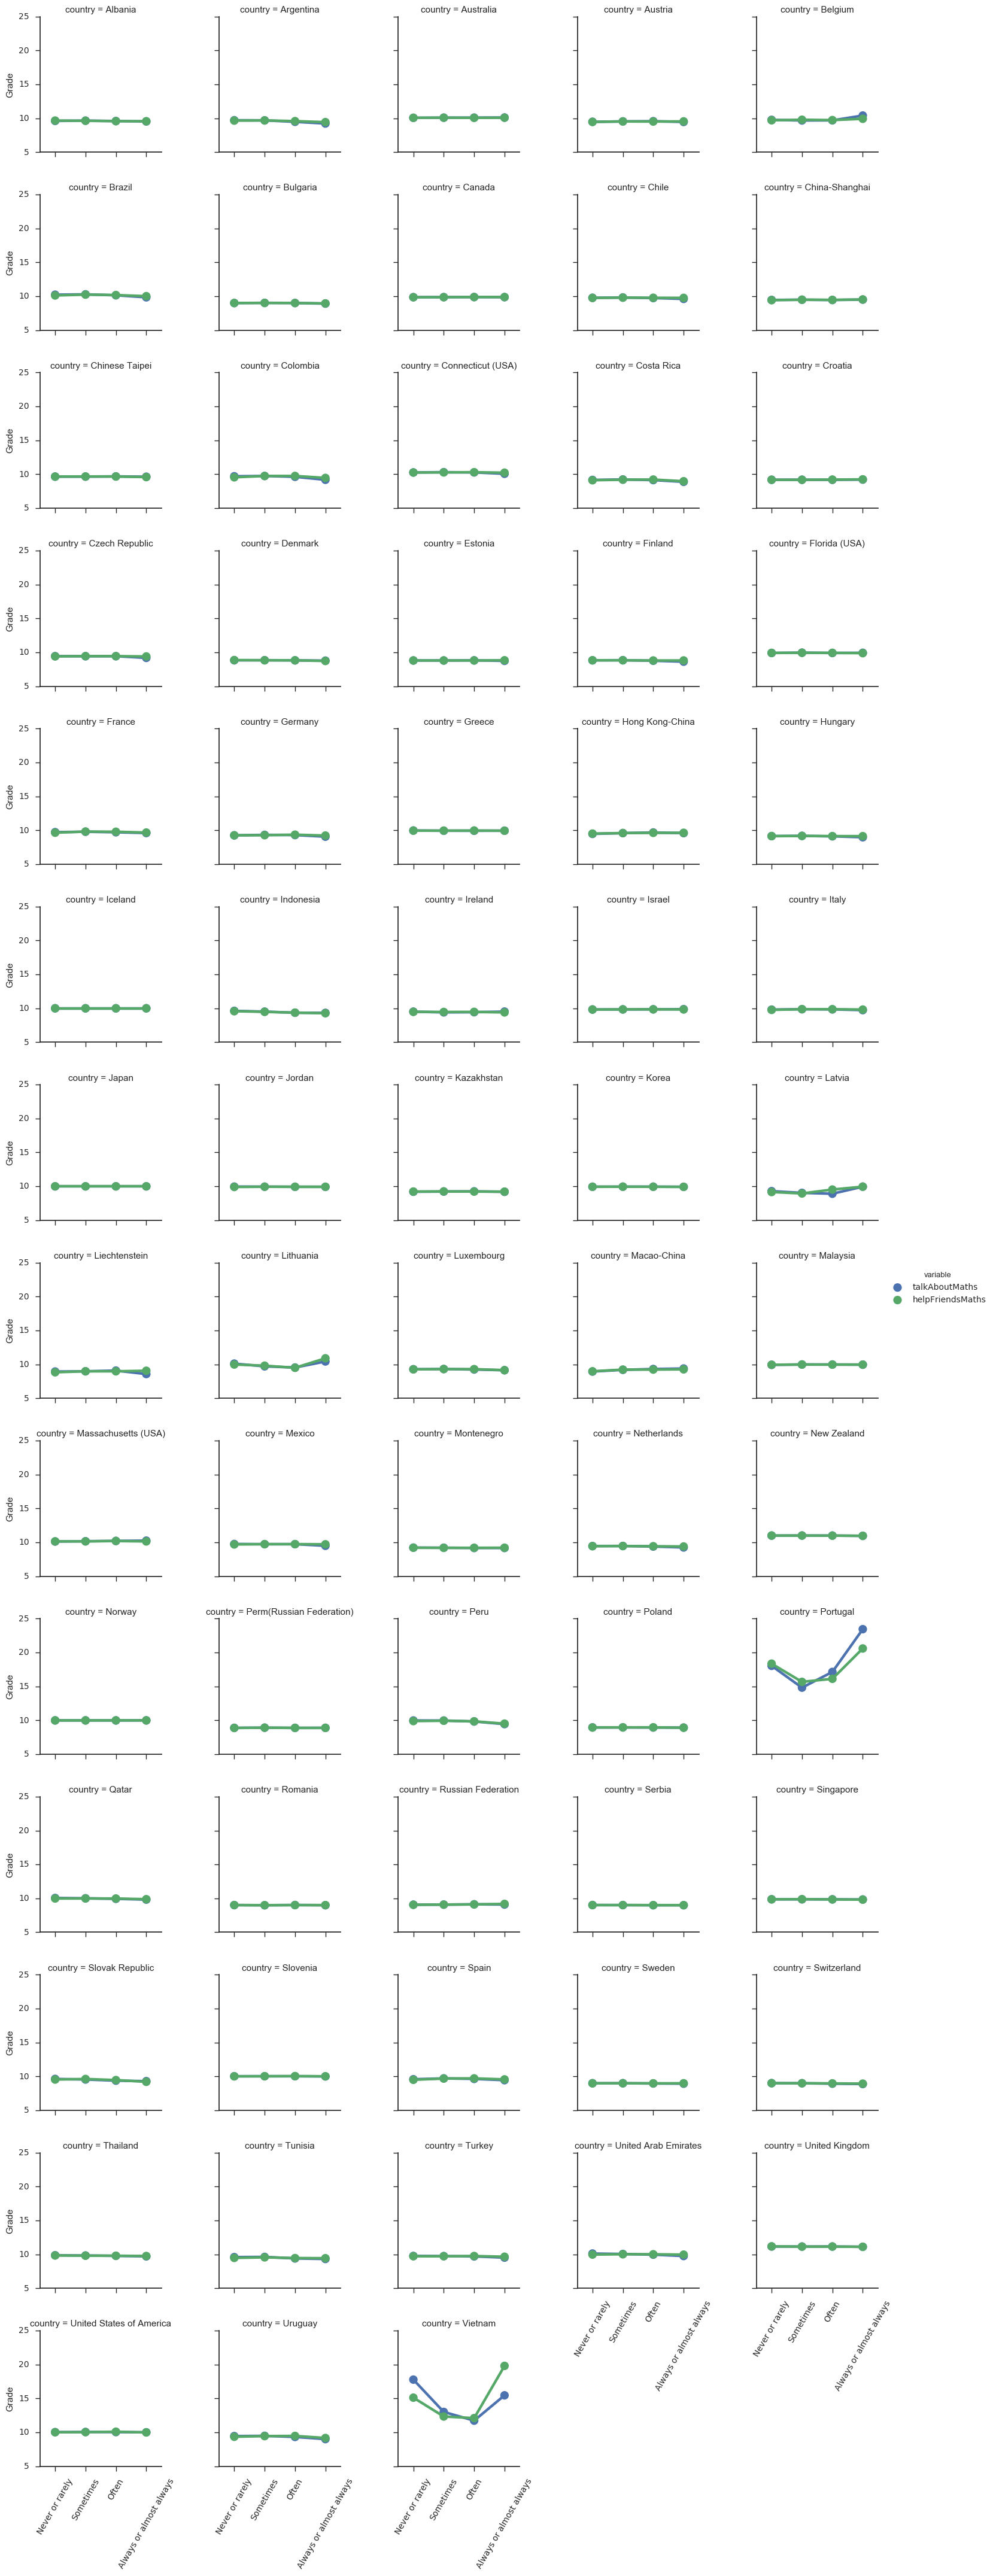

In [161]:
df_talkAbout = get_variable_frequency(df_student_behavior, 'talkAboutMaths')
df_helpFriends = get_variable_frequency(df_student_behavior, 'helpFriendsMaths')
df_participateInCompetitions = get_variable_frequency(df_student_behavior, 'participateInCompetitions')

df_merge = df_talkAbout.merge(df_helpFriends,
                              on=['country', 'frequency'],
                              how='inner')

# df_merge

df_test = pd.melt(df_merge, id_vars=['country', 'frequency'], value_vars=['talkAboutMaths', 'helpFriendsMaths'])
df_test['frequency'] = df_test['frequency'].astype('category')
df_test['frequency'].cat.reorder_categories(['Never or rarely', 'Sometimes', 'Often', 'Always or almost always'], inplace=True)


g = sns.factorplot(x='frequency', y='value', hue='variable',
                   col='country', data=df_test, col_wrap=5, size=3, aspect=1)
g.set_xticklabels(rotation=60)
g.set_axis_labels('', 'Grade')

In [22]:
print('# of Countries:', len(df_student_behavior['country'].unique()))
df_student_behavior['country'].value_counts()

# of Countries: 68


Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Jordan                       7038
Chile                        6856
Thailand                     6606
Japan                        6351
Chinese Taipei               6046
Peru                         6035
Slovenia                     5911
Argentina                    5908
Kazakhstan                   5808
Portugal                     5722
Indonesia                    5622
Singapore                    5546
Macao-China                  5335
Czech Republic               5327
Uruguay                      5315
Bulgaria      

In [51]:
df_student_behavior.groupby('country').mean()['internationalGrade'].sort_values(ascending=False)

country
Portugal                    17.198357
Vietnam                     13.150232
United Kingdom              11.157358
New Zealand                 10.992076
Belgium                     10.727579
Connecticut (USA)           10.268709
Massachusetts (USA)         10.160186
Brazil                      10.144918
Australia                   10.076031
United States of America    10.051828
Slovenia                    10.022162
Iceland                     10.000000
Japan                       10.000000
Norway                       9.996159
United Arab Emirates         9.985652
Malaysia                     9.964980
Greece                       9.952000
Qatar                        9.950575
Korea                        9.943374
Jordan                       9.928105
Florida (USA)                9.906646
Lithuania                    9.899091
Canada                       9.873236
Singapore                    9.867111
Peru                         9.837283
Israel                       9.836597
Ital

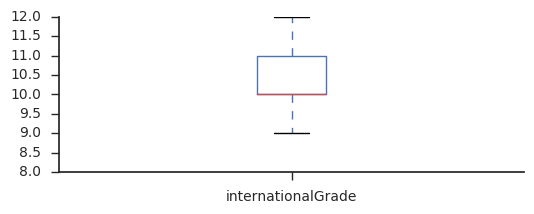

In [43]:
# sns.set_style("ticks")
sns.despine()

df_student_behavior['internationalGrade'].describe()

ax=df_student_behavior[df_student_behavior['country'] == 'Brazil']['internationalGrade'].plot(
    kind='box',
    figsize=(6,2)
)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [63]:
df_student_behavior[df_student_behavior['country'] == 'Portugal']['internationalGrade'].quantile(.9)

10.0

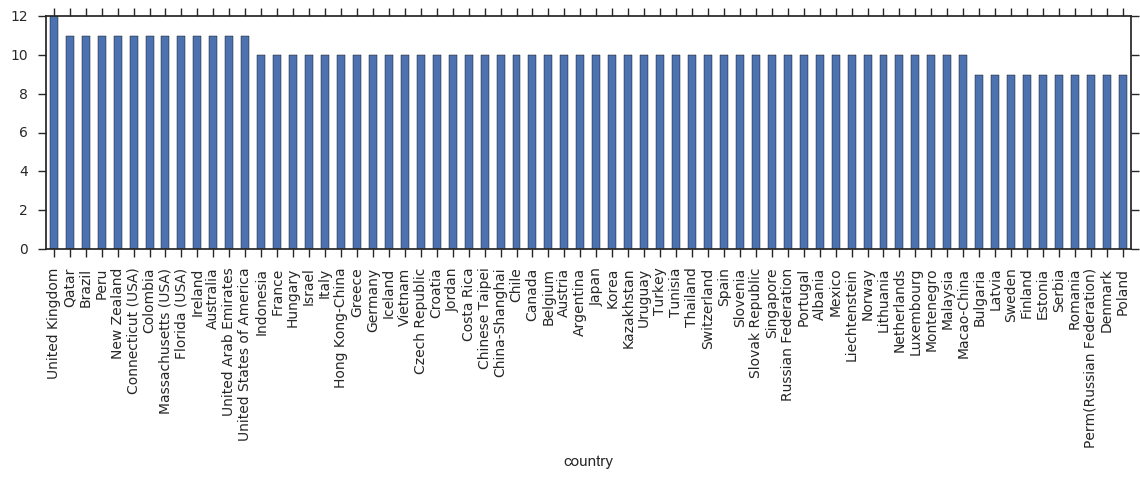

In [65]:
m = df_student_behavior.groupby('country')

errors = m['internationalGrade'].std().sort_values(ascending=False)
m['internationalGrade'].quantile(.9).sort_values(ascending=False).plot(
    kind='bar',
    figsize=(14,3)
)